<h1 align="center">Convex Optimization - 25756</h1>
<h4 align="center">Dr. yasaee</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 2</h4>
<h4 align="center">Amir Hossein Yari</h4>
<h5 align="center">99102507</h5>



## <font color='yellow'>1. Maximum Likelihood Estimation</font>

<font color='yellow'>Fourth Part</font>

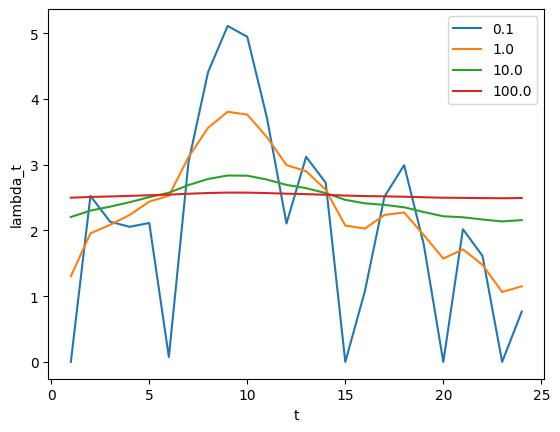

In [75]:
# add required packages
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


def circular_differential_matrix(n):
    circular_diff_matrix = np.zeros((n, n))
    for i in range(n):
        circular_diff_matrix[i, i] = -1
        circular_diff_matrix[i, (i + 1) % n] = 1
    return circular_diff_matrix


N = np.array([0,4,2,2,3,0,4,5,6,6,4,1,4,4,0,1,3,4,2,0,3,2,0,1])
rho = np.array([0.1,1,10,100])
landas = np.zeros((4,24))
j=0


for i in rho:
    landa = cp.Variable(24)
    obj_func = cp.Maximize(cp.sum(-landa + cp.multiply(N,cp.log(landa))) - cp.multiply(i,cp.sum((circular_differential_matrix(24)@landa)**2)))
    constraints = []
    prob = cp.Problem(obj_func, constraints) 
    prob.solve()

    # plotting
    plt.plot(range(1,25), landa.value, label = i)
    plt.xlabel("t")
    plt.ylabel("lambda_t")
    plt.legend()

<font color='yellow'>Fifth Part</font>

In [76]:
N_test = np.array([0,1,3,2,3,1,4,5,3,1,4,3,5,5,2,1,1,1,2,0,1,2,1,0])

for i in rho:
    landa = cp.Variable(24)
    obj_func = cp.Maximize(cp.sum(-landa + cp.multiply(N,cp.log(landa))) - cp.multiply(i,cp.sum((circular_differential_matrix(24)@landa)**2)))
    constraints = []
    prob = cp.Problem(obj_func, constraints) 
    prob.solve()
    print(cp.sum(-landa + cp.multiply(N_test,cp.log(landa))).value)
    

-54.89651503941711
-7.090076886222096
-11.056694980432539
-13.104061134250635


## <font color='yellow'>2. Optimal Activity Levels</font>

In [1]:
# add required packages
import numpy as np
import cvxpy as cp

# initialize variables
A = np.array([[1, 2, 0, 1], [0, 0, 3, 1], [0, 3, 1, 1], [2, 1, 2, 5], [1, 0, 3, 2]])
c_max = np.array([100, 100, 100, 100, 100])
p = np.array([3, 2, 7, 6])
q = np.array([4, 10, 5, 10])
p_disk = np.array([2, 1, 4, 2])

# solve problem
x = cp.Variable(4)
r_1 = cp.multiply(p,x)
r_2 = cp.multiply(p,q) + cp.multiply(p_disk,(x-q))
obj_func = cp.Maximize(cp.sum(cp.minimum(r_1,r_2)))
constraints = [A*x<=c_max, x>=0]
prob = cp.Problem(obj_func, constraints) 
prob.solve()

# calculation of the demands of the problem and print it
print("optimal activity levels = ", x.value)
r = cp.minimum(r_1,r_2).value
print("revenue of each one = ", r)
total = np.sum(r)
print("total revenue = ", total) 
avg_price = r / x.value
print("average price per unit for each activity = ", avg_price)

optimal activity levels =  [ 3.99999996 22.49999989 30.99999995  1.50000005]
revenue of each one =  [ 11.99999989  32.49999989 138.99999981   9.00000032]
total revenue =  192.49999991412406
average price per unit for each activity =  [3.         1.44444445 4.48387097 6.        ]


e:\Python\Lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


## <font color='yellow'>3. Optimal Vehicle Speed Scheduling</font>

The optimal fuel consumption is  2617.825193619691 Kg


Text(0.5, 1.0, 'optimal speed over each segment')

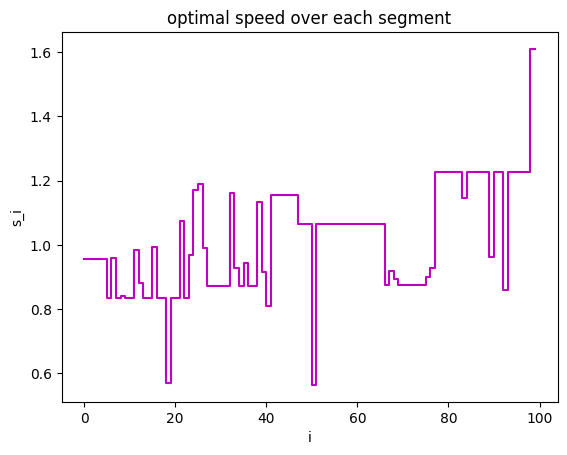

In [83]:
# add required packages
import cvxpy as cp
import matplotlib.pyplot as plt
from veh_speed_sched_data import *

# solve problem
t = cp.Variable(n)
obj_func = cp.sum(cp.multiply(a,cp.multiply(cp.multiply(d,d),cp.inv_pos(t))) + cp.multiply(b,d) + cp.multiply(c,t))
constraints = [t<=d/smin, t>=d/smax]
constraints += [tau_min[i] <= cp.sum(t[0:i+1]) for i in range(n)]
constraints += [tau_max[i] >= cp.sum(t[0:i+1]) for i in range(n)]
prob = cp.Problem(cp.Minimize(obj_func), constraints)
prob.solve()

# calculate optimal fuel consumption
s = d / t.value
print("The optimal fuel consumption is ", obj_func.value, "Kg")

# plot optimal speed over each segment
plt.step(range(n), s, "m")
plt.xlabel("i")
plt.ylabel("s_i")
plt.title("optimal speed over each segment")

## <font color='yellow'>4. Reformulate Constraint</font>

$\bullet$ $\frac{1}{x}+\frac{1}{y} \leqslant 1$, $x\geqslant 0$, $y \geqslant 0$

In [2]:
import cvxpy as cp
x = cp.Variable(1)
y = cp.Variable(1)
constraints = [cp.inv_pos(x) + cp.inv_pos(y) <= 1]
prob = cp.Problem(cp.Minimize(obj_func), constraints)
prob.solve()

10584.64675234136

$\bullet$ $xy \geqslant 1$, $x\geqslant 0$, $y\geqslant 0$

In [3]:
import cvxpy as cp
x = cp.Variable(1)
y = cp.Variable(1)
constraints = [x >= cp.inv_pos(y)]
prob = cp.Problem(cp.Minimize(obj_func), constraints)
prob.solve()

10584.646752341932

$\bullet$ $\frac{(x+y)^2}{\sqrt{y}} \leqslant x-y+5$, $y \geqslant 0$

In [4]:
import cvxpy as cp
x = cp.Variable(1)
y = cp.Variable(1)
constraints = [cp.quad_over_lin(x+y, cp.sqrt(y)) <= x-y+5]
prob = cp.Problem(cp.Minimize(obj_func), constraints)
prob.solve()

10584.64675237198

$\bullet$ $x+z \leqslant 1 + \sqrt{xy-z^2}$, $x\geqslant 0$, $y\geqslant 0$

In [25]:
import cvxpy as cp
x = cp.Variable(1)
y = cp.Variable(1)
z = cp.Variable(1)
f = x - cp.quad_over_lin(z, y)
constraints = [(x + z) <= (1 + cp.geo_mean(cp.hstack([f, y])))]
prob = cp.Problem(cp.Minimize(obj_func), constraints)
prob.solve()

10584.64675234681